In [1]:
from maelzel.core import *

In [2]:
w = getWorkspace()
w.presetManager.showPresets()

In [3]:
s = w.audioSession()

using libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


In [16]:
foo = defPreset('foo', r'''
|ibusL, ibusR|
; prints "ibusL: %d, ibusR: %d\n", ibusL, ibusR
aout1 oscili kamp, kfreq
aout2 = aout1
aout2 oscili kamp, kfreq+4

busmix ibusL, aout1
busmix ibusR, aout2
''', output=False)

s.defInstr('master', r'''
    |ibusL, ibusR, kgain=1|
    aL busin ibusL
    aR busin ibusR
    outch 1, aL * kgain, 2, aR * kgain
    ''')

Instr(master, ibusL=0, ibusR=0, kgain=1)

In [17]:
presetManager.showPresets("foo", generatedCode=True)

In [6]:
busL = s.assignBus()
busR = s.assignBus()


In [7]:
master = s.sched('master', args=dict(ibusL=busL, ibusR=busR), priority=3)

In [21]:
Note(60.5, 30).play(instr='foo', gain=0.01, ibusL=busL, ibusR=busR)

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(‖ preset:foo=401.0011 start=205.003 dur=30 kpos=0.5 kgain=0.01 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 …)

In [23]:
master.set('kgain', 0.9)

In [24]:
master.stop()

In [11]:
foo = s.defInstr('foo', r'''
    |itime, Sfoo|
    ielapsed times
    prints "Sfoo: %s, itime: %f, ielapsed: %f, diff: %f\n", Sfoo, itime, ielapsed, ielapsed - itime 
    turnoff
''', priority=1)

In [26]:
test = s.defInstr('test', r'''
    |ichan=0|
    prints "ichan: %d\n", ichan
    Schan = "bar"
    ; Schan strget ichan
    prints "Schan: %s\n", Schan
    a0 oscili 0.1, 1000
    ; chnset a0, Schan
''')


In [29]:
from maelzel.core import *

preset = defPreset('mysynth', r'''
|idecratio=2, isust=0.1|
asig vco2 kamp, kfreq, 12
asig *= adsr(ifadein, ifadein*idecratio, isust, ifadeout) 
asigL, asigR pan2 asig, kpos
chnmix asigL, "left"
chnmix asigR, "right"
''')
preset

Preset: mysynth  
    routing=False
  |idecratio=2.0, isust=0.1|
  asig vco2 kamp, kfreq, 12
  asig *= adsr(ifadein, ifadein*idecratio, isust, ifadeout) 
  asigL, asigR pan2 asig, kpos
  chnmix asigL, "left"
  chnmix asigR, "right"

In [31]:
w = getWorkspace()
session = w.audioSession()
session.defInstr('reverb', r'''
|kwet=0.8, kfeedback=0.85, kcutoff=12000, ipitchmod=0.3|
aleft = chnget:a("left")
aright = chnget:a("right")
awetL, awetR reverbsc aleft, aright, kfeedback, kcutoff, sr, ipitchmod
outch 1, awetL * kwet + aleft * (1 - kwet), 2, awetR * kwet + aright * (1 - kwet)
chnclear "left", "right"
''')


Instr(reverb, kwet=0.8, kfeedback=0.85, kcutoff=12000, ipitchmod=0.3)

In [32]:
reverb = session.sched('reverb', priority=2, kwet=0.85, kfeedback=0.74)


In [33]:
chain = Chain([Note(p, 1).setPlay(instr='mysynth', fade=(0.01, 0.1), idecratio=1, isust=0.2, sustain=-0.25, gain=0.1)
               for p in range(48, 100)])
# chain

In [34]:
chain.play()

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=52)
    Synth(‖ preset:mysynth=402.0002 start=323.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0003 start=324.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0004 start=325.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0005 start=326.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0006 start=327.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0007 start=328.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0008 start=329.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0009 start=330.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.001 start=331.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0011 start=332.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0012 start=333.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0013 start=334.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0014 start=335.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0015 start=336.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0016 start=337.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0017 start=338.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0018 start=339.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0019 start=340.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.002 start=341.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0021 start=342.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0022 start=343.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0023 start=344.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0024 start=345.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0025 start=346.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0026 start=347.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0027 start=348.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0028 start=349.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0029 start=350.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.003 start=351.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0031 start=352.905 dur=1 kpos=0.5 kgain=0.1 idataidx_=17 inumbps=2 ibplen=3 ichan=1 ifadein=0.01 …)
    Synth(‖ preset:mysynth=402.0032 start=353.905 dur=1 

In [6]:
reverb.ui()

Button(description='Stop', style=ButtonStyle())

FloatSlider(value=12000.0, description='kcutoff', layout=Layout(width='80%'), max=120000.0, readout_format='d'…

FloatSlider(value=0.7, description='kfeedback', layout=Layout(width='80%'), max=2.0, readout_format='.3f', ste…

FloatSlider(value=0.5, description='kwet', layout=Layout(width='80%'), max=2.0, readout_format='.3f', step=0.0…

In [35]:
chain.synthEvents()[:5]

[SynthEvent(delay=0, dur=0.25, instr=mysynth, gain=1, chan=1, fade=(0.01, 0.1), linkednext=True, args={'idecratio': 1, 'isust': 0.6}, sustain=5, position=0.5, bps=‹0.0s 48 0.515178; 0.25s 48 0.515178›),
 SynthEvent(delay=0.25, dur=0.25, instr=mysynth, gain=1, chan=1, fade=(0.01, 0.1), linkednext=True, args={'idecratio': 1, 'isust': 0.6}, sustain=5, position=0.5, bps=‹0.0s 49 0.515178; 0.25s 49 0.515178›),
 SynthEvent(delay=0.5, dur=0.25, instr=mysynth, gain=1, chan=1, fade=(0.01, 0.1), linkednext=True, args={'idecratio': 1, 'isust': 0.6}, sustain=5, position=0.5, bps=‹0.0s 50 0.515178; 0.25s 50 0.515178›),
 SynthEvent(delay=0.75, dur=0.25, instr=mysynth, gain=1, chan=1, fade=(0.01, 0.1), linkednext=True, args={'idecratio': 1, 'isust': 0.6}, sustain=5, position=0.5, bps=‹0.0s 51 0.515178; 0.25s 51 0.515178›),
 SynthEvent(delay=1, dur=0.25, instr=mysynth, gain=1, chan=1, fade=(0.01, 0.1), linkednext=True, args={'idecratio': 1, 'isust': 0.6}, sustain=5, position=0.5, bps=‹0.0s 52 0.515178

4C♯+15:1♩
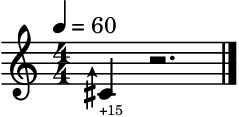

In [32]:
Note("4C#+15")